In [2]:
import numpy as np

### Numpy array vs Python lists

In [4]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time 

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

1.3717851638793945


In [5]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.12674880027770996


In [6]:
1.37/0.12

11.416666666666668

In [7]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [8]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000112

In [ ]:
# convenience

### Advanced Indexing

In [12]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [13]:
a[1,2]

np.int64(6)

In [15]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [17]:
# Fancy Indexing
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [18]:
# Boolean Indexing
import numpy as np
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[28, 57, 86,  5],
       [69, 56, 47, 16],
       [17, 28,  5, 77],
       [49, 43, 60, 45],
       [57, 13, 59, 37],
       [18,  6, 68, 26]], dtype=int32)

In [21]:
# find all numbers greater than 50
a[a > 50]

array([57, 86, 69, 56, 77, 60, 57, 59, 68], dtype=int32)

In [22]:
#find out even numbers
a[a%2 == 0]

array([28, 86, 56, 16, 28, 60, 18,  6, 68, 26], dtype=int32)

In [23]:
# find all numbers greater than 50 and are even . & -> "bitwise and" and its used in boolean operations whereas 'and' is a logical operator and not used here
a[(a > 50) & (a%2==0)]

array([86, 56, 60, 68], dtype=int32)

In [24]:
# find all numbers not divisible by 7. ~ -> invert operator and turns True to False and vise versa
a[~(a%7==0)]

array([57, 86,  5, 69, 47, 16, 17,  5, 43, 60, 45, 57, 13, 59, 37, 18,  6,
       68, 26], dtype=int32)

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [25]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [27]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)
print(a)
print(b)
print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [31]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [32]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [34]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [36]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [ ]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

In [37]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b) #error because brodcasting occurs only if there is 1 in either arrays

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [ ]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

### Working with mathematical formulas

In [38]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [39]:
# sigmoid
def sigmoid(array):
  return 1 /(1 + np.exp(-(array)))


In [41]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [42]:
a = np.arange(100)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [19]:
# mean squared error
actual = np.random.random(25)
predicted = np.random.random(25)

In [20]:
print(actual)
print(predicted)

[0.70820752 0.46002263 0.19807869 0.93758619 0.41460992 0.47302472
 0.1582882  0.71266916 0.94959091 0.7221731  0.17121496 0.51730722
 0.52622839 0.77822613 0.20702781 0.68772143 0.58348983 0.41993371
 0.31376153 0.0910437  0.26820624 0.76606295 0.01525876 0.05141902
 0.34316031]
[0.35246233 0.61715529 0.07876068 0.85445395 0.36695099 0.51187348
 0.89669782 0.23791283 0.56997872 0.23672568 0.75470447 0.33887954
 0.52889978 0.01971334 0.87413791 0.18672731 0.80398368 0.01560561
 0.08269833 0.91951688 0.30590508 0.96542587 0.35343628 0.36218054
 0.47305846]


In [21]:
def mse(actual,predicted):
  return np.mean((actual-predicted)**2)

mse(actual,predicted)

np.float64(0.16764362644257422)

In [24]:
# binary cross entropy (log loss) -> for logistic regression
# - (1/N) * Σ(y_i * log(p_i) + (1 - y_i) * log(1 - p_i))
# y -> actual , f(x) -> predicted
def categorical_cross_entropy(actual,predicted):
    """calculates the binary categorical cross entropy for the actual and predicted values

    Args:
        actual (_type_): y
        predicted (_type_): f(x) from the model
    
    Returns log loss
    """
    total_loss = []
    for i in range(len(actual)):
        loss = (actual[i]*np.log(predicted[i])) + (1 - actual[i]) * np.log(1 - predicted[i])
        total_loss.append(loss)
    
    return - (1/len(actual)) * sum(total_loss)
        
    # print(total_loss)
    # print("Log_loss: ", sum(total_loss))
    

In [25]:
categorical_cross_entropy(actual=actual,predicted=predicted)

np.float64(1.0343375817448637)

### Working with missing values

In [47]:
np.nan

nan

In [50]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [52]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [53]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

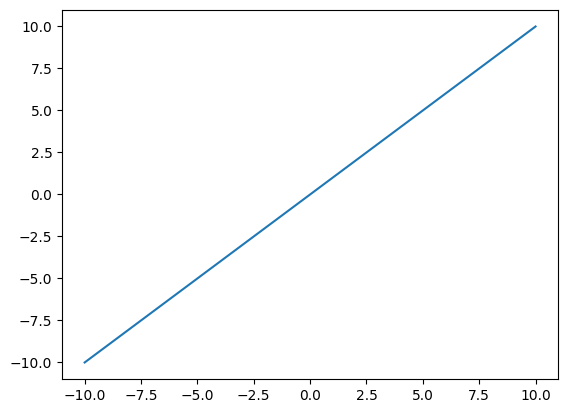

In [26]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)

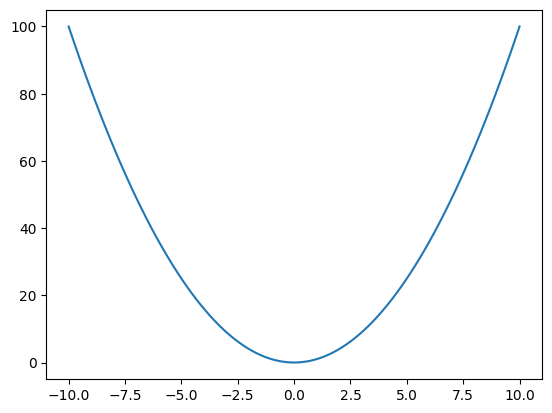

In [29]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2
plt.plot(x,y)

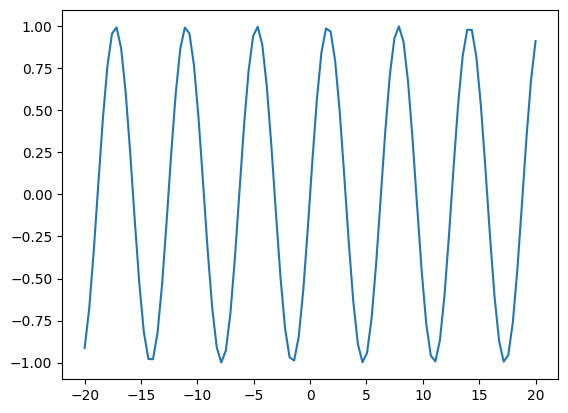

In [33]:
# y = sin(x)
x = np.linspace(-20,20,100)
y = np.sin(x)
plt.plot(x,y)

C:\Users\tejas\AppData\Local\Temp\ipykernel_12216\3858238929.py:3: RuntimeWarning: invalid value encountered in log
  y = x*(np.log(x))


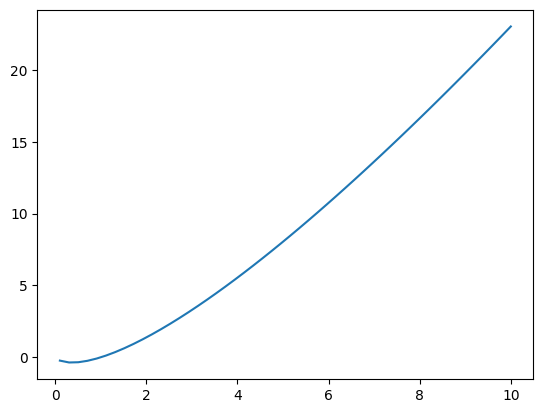

In [31]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x*(np.log(x))
plt.plot(x,y)

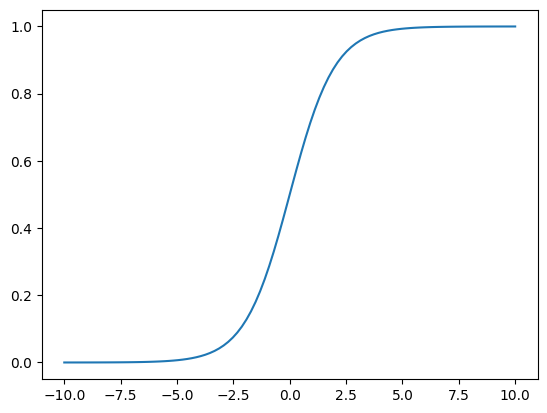

In [32]:
#sigmoid 
x = np.linspace(-10,10,100)

y = 1/(1+np.exp(-x))

plt.plot(x,y)

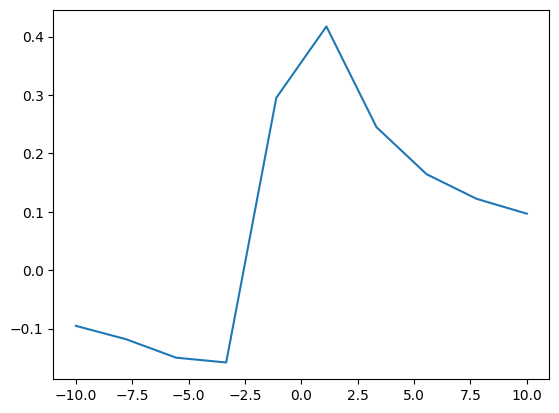

In [37]:
# plotting a scatter plot
# y = x + 2 / x**2 + 2x + 5

x = np.linspace(-10 , 10 , 10 )
y = (x  + 2) / (x**2 + x*2 +  4)
plt.plot(x,y) 

### Meshgrids

In [ ]:
# Meshgrids

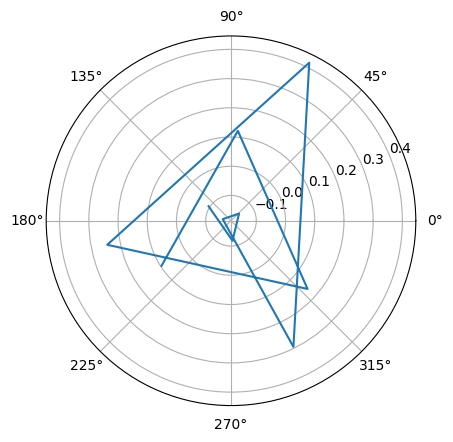

In [46]:
plt.polar(x,y)
plt.show()